# Import Relevant Packages

In [1]:
# Import everything
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import os

# Merge mooring data

In [2]:
def data_merge(equipment, year, d):
    depth = d
    base_df = pd.DataFrame({"date_time" : pd.date_range(str(year) + '-01-01', str(year) + '-12-31', tz='UTC', freq = '2T')})
    for i in depth:
        path = 'Data/SWC001/' + str(equipment) + '/' + str(year) + '/' + str(i) + 'm/'
        files = os.listdir(path)
        file_len = list(range(1, len(files)))
        df1 = pd.read_csv(("Data/SWC001/" + str(equipment) + "/" + str(year) + "/" + str(i) + "m/" + str(files[0])), delimiter='\s+', skiprows=[1], parse_dates=[[0, 1]])
        for val in file_len:
            df2 = pd.read_csv(("Data/SWC001/" + str(equipment) + "/" + str(year) + "/" + str(i) + "m/" + str(files[val])), delimiter='\s+', skiprows=[1], parse_dates=[[0, 1]])
            df1 = df1.append(df2, ignore_index=True)
        df1['temp_c'] = pd.to_numeric(df1['temp_c'])
        df1['date_time'] = pd.to_datetime(df1['date_time'])
        df1 = df1[df1['temp_c'] < 9000]
        df_final = pd.DataFrame({"date_time" : df1['date_time'], "temp_c" + str(i) : df1['temp_c']})
        base_df = pd.merge(base_df, df_final, how='outer', on='date_time')
    return base_df

# Creating p-color plots

In [3]:
def depth_plot(base_df):
    temp_df = base_df.iloc[:, 1:]
    temp_arr = temp_df.to_numpy()
    temp_arr_t = temp_arr.T
    plt.figure(figsize=(10,4))
    plt.pcolor(temp_arr_t)
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

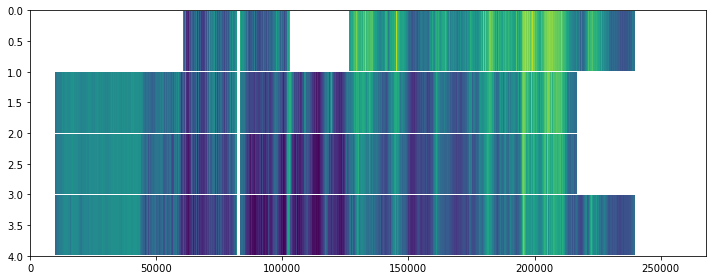

In [4]:
dep = [0,5,13,21]
SWC_2000 = data_merge('Mooring', 2000, dep)
depth_plot(SWC_2000)

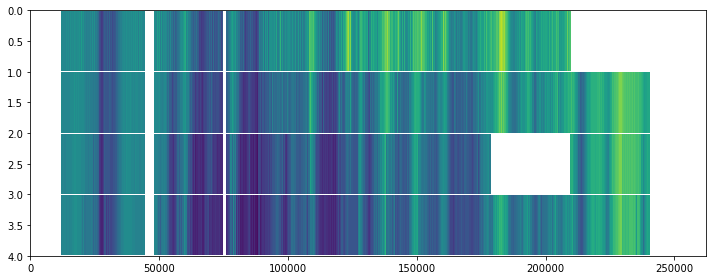

In [5]:
SWC_2001 = data_merge('Mooring', 2001, dep)
depth_plot(SWC_2001)

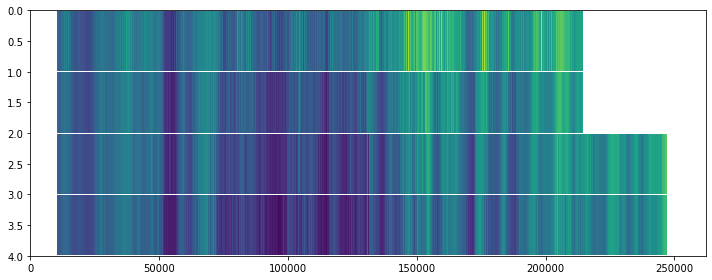

In [6]:
SWC_2002 = data_merge('Mooring', 2002, dep)
depth_plot(SWC_2002)

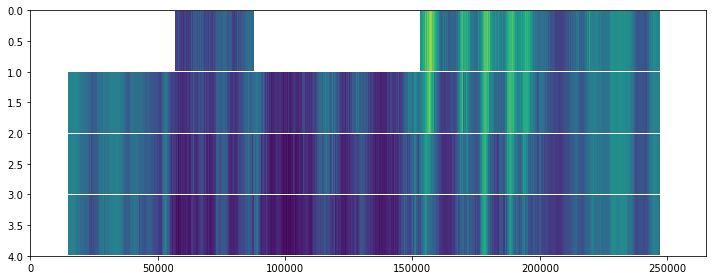

In [7]:
SWC_2003 = data_merge('Mooring', 2003, dep)
depth_plot(SWC_2003)

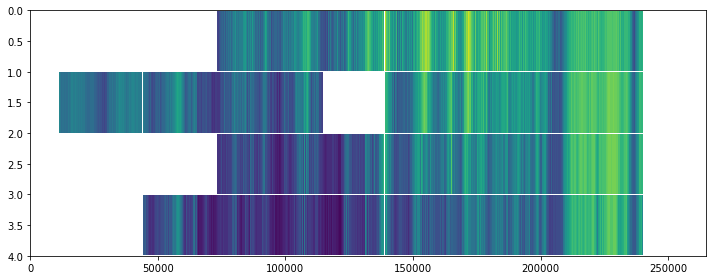

In [8]:
SWC_2004 = data_merge('Mooring', 2004, dep)
depth_plot(SWC_2004)

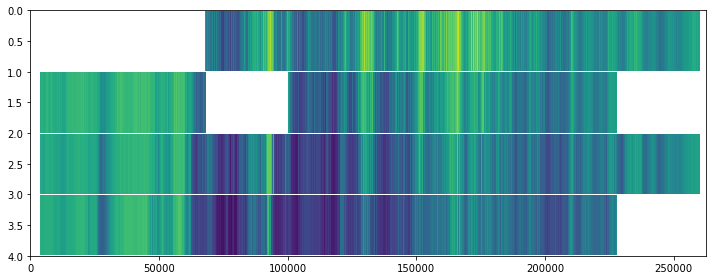

In [7]:
SWC_2005 = data_merge('Mooring', 2005, dep)
depth_plot(SWC_2005)

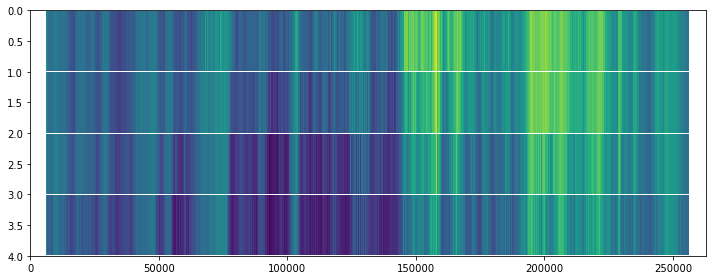

In [10]:
SWC_2006 = data_merge('Mooring', 2006, dep)
depth_plot(SWC_2006)

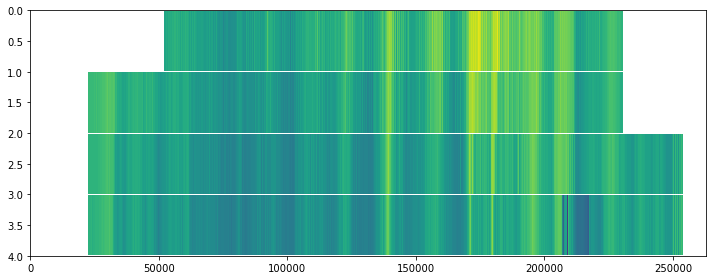

In [11]:
SWC_2007 = data_merge('Mooring', 2007, dep)
depth_plot(SWC_2007)

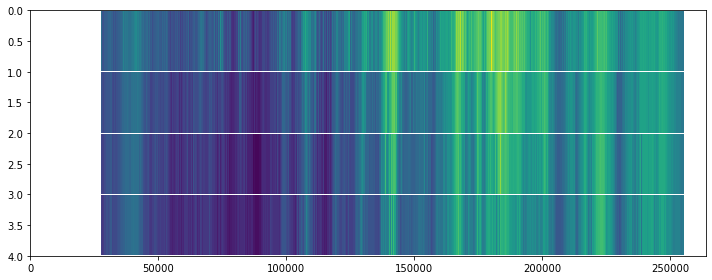

In [12]:
SWC_2008 = data_merge('Mooring', 2008, dep)
depth_plot(SWC_2008)

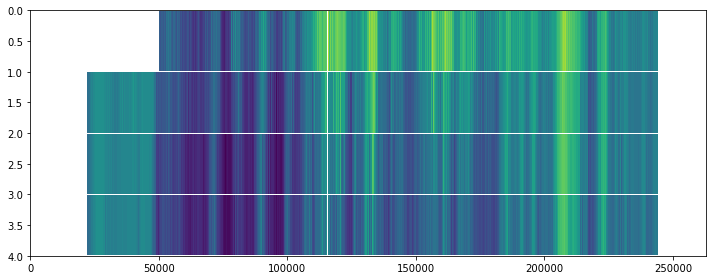

In [13]:
SWC_2009 = data_merge('Mooring', 2009, dep)
depth_plot(SWC_2009)

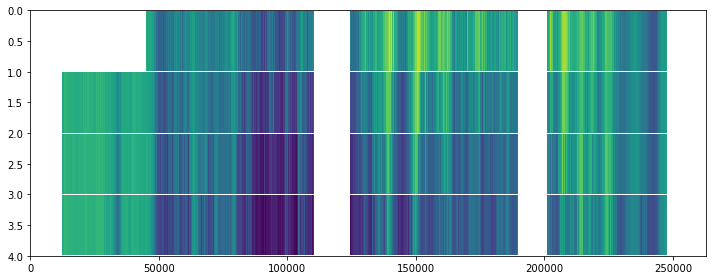

In [14]:
SWC_2010 = data_merge('Mooring', 2010, dep)
depth_plot(SWC_2010)

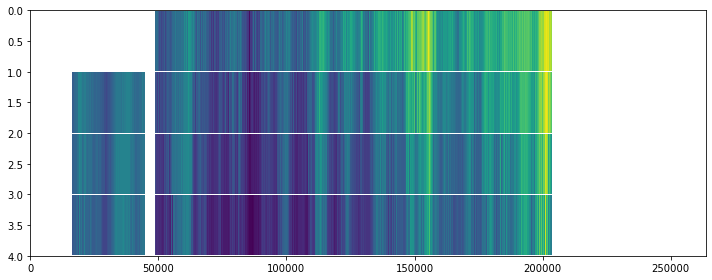

In [15]:
SWC_2011 = data_merge('Mooring', 2011, dep)
depth_plot(SWC_2011)

# ISTCXX DATA

#Use to merge text files
#Creating a list of filenames 
filenames = ['1.1-12.31_02.txt', '1.1-7.7_05.txt', '7.7-12.31_05.txt', '1.1-12.31_06.txt', '1.1-12.31_08.txt', '1.1-12.25_09.txt', '4.20-12.31_10.txt',
             '1.1-3.28_11.txt', '3.28-12.31_11.txt', '1.1-12.31_12.txt', '1.1-12.31_13.txt', '1.1-11.25_14.txt', '4.20-10.26_15.txt', '4.12-12.31_16.txt'
            , '1.1-12.31_17.txt', '12.6.17-5.15_18.txt', '5.17-11.5_18.txt', '4.23-11.26_19.txt'] 
  
#Open file3 in write mode 
with open('all_data.txt', 'w') as outfile: 
  
    # Iterate through list 
    for names in filenames: 
  
        # Open each file in read mode 
        with open(names) as infile: 
  
            # read the data from file1 and 
            # file2 and write it in file3 
            outfile.write(infile.read()) 
  
        # Add '\n' to enter data of file2 
        # from next line 
        outfile.write("\n") 

In [16]:
# Once all files have been imported and combined into a single text file, get the text file as a dataframe
filename = 'Data/ISTCXX/all_data.txt'
df = pd.read_csv(filename, delimiter='\s+', skiprows=[1], parse_dates=[[0, 1]])

# Change the temperature values into float numbers
tempc = pd.to_numeric(df['tempc'])

Text(0, 0.5, 'TempC')

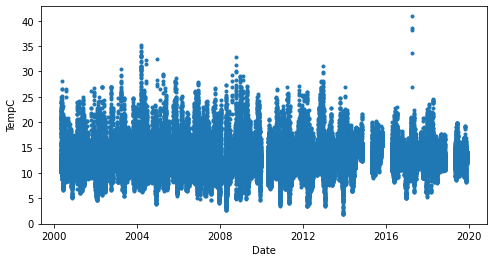

In [17]:
#Plot everything
plt.figure(figsize=(8, 4))
plt.plot(df['date_time'], tempc, ".")
plt.xlabel('Date')
plt.ylabel('TempC')

# Importing ADCP Data